<a href="https://colab.research.google.com/github/BhavasriV02/page_number_detection/blob/main/pagenumber_traditional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,748 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
pip install easyocr opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9


=== Extracted Text from Top-Right ===
9245,


=== Detected Page Number: 9245 ===


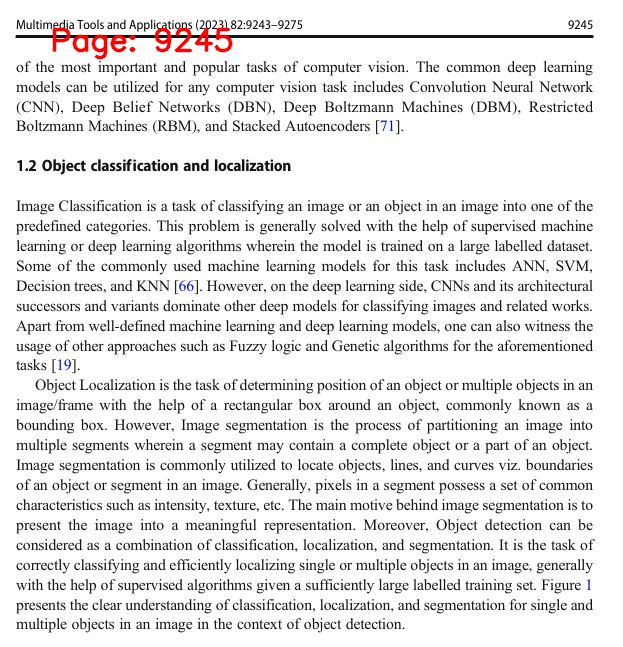


=== Extracted Text from Top-Right ===
2


=== Detected Page Number: 2 ===


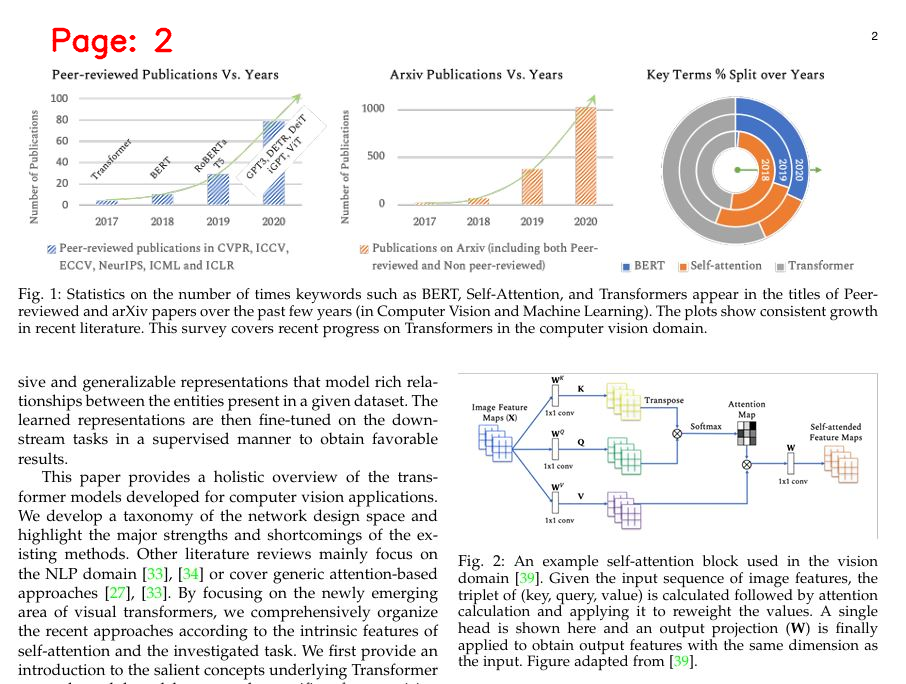


=== Extracted Text from Top-Right ===
~,:


=== No page number detected! ===

=== Detected Page Number: Not detected ===


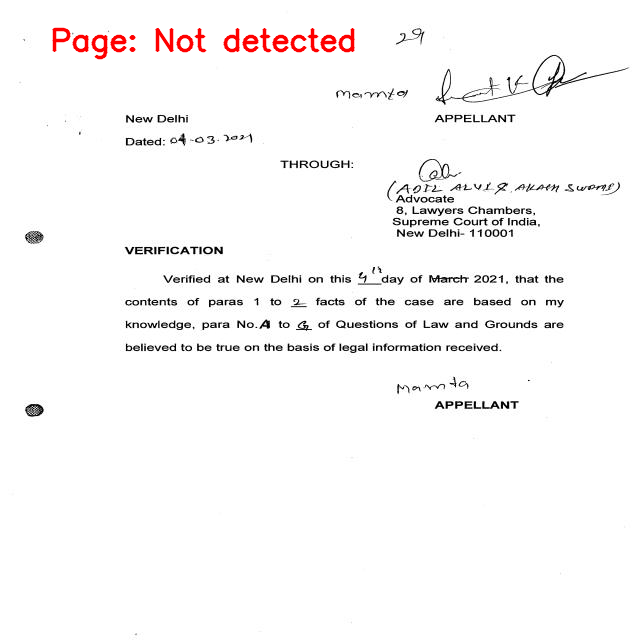

In [ ]:
import cv2
import pytesseract
import re
import numpy as np
import os
# Import the necessary function for displaying images in Colab
from google.colab.patches import cv2_imshow

def preprocess_image(image_path):
    """Preprocess image to enhance text detection."""
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Adaptive thresholding to improve text clarity
    processed = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

    return image, processed

def extract_page_number(image_path):
    """Extract page number from the top-right corner of the image and display the image."""
    original_image, processed = preprocess_image(image_path)

    # Get image dimensions
    height, width = processed.shape

    # Crop top-right 10% of the image (fine-tuned)
    top_right_crop = processed[:int(height * 0.1), int(width * 0.85):]  # Rightmost 15% of the width

    # OCR on cropped region
    extracted_text = pytesseract.image_to_string(top_right_crop, config='--psm 6')

    print("\n=== Extracted Text from Top-Right ===")
    print(extracted_text)

    # Extract only 1-4 digit numbers (avoiding long numbers like journal IDs)
    candidates = re.findall(r"\b\d{1,4}\b", extracted_text)

    if not candidates:
        print("\n=== No page number detected! ===")
        detected_page_number = "Not detected"
    else:
        # Convert to integers and pick the most probable page number
        candidates = [int(num) for num in candidates if 1 <= int(num) <= 9999]
        detected_page_number = min(candidates) if candidates else "Not detected"

    print(f"\n=== Detected Page Number: {detected_page_number} ===")

    # Display image with detected page number using cv2_imshow
    cv2.putText(original_image, f'Page: {detected_page_number}', (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2_imshow(original_image) # Use cv2_imshow instead of cv2.imshow


# Updated image paths
image_path1 = "/content/testcase1.JPG"
image_path2 = "/content/testcase2.JPG"
image_path3 = "/content/04_02_2023_17_02_322_page_33_png.rf.c7330749a56ba9df592d4c3eaa9a176d.jpg"


extract_page_number(image_path1)
extract_page_number(image_path2)
extract_page_number(image_path3)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteDetected Page Number: 102


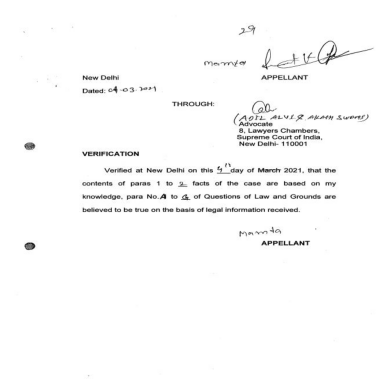

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Load image
image_path = "/content/04_02_2023_17_02_322_page_33_png.rf.c7330749a56ba9df592d4c3eaa9a176d.jpg"  # Update with your image path
image = cv2.imread(image_path)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Perform OCR
results = reader.readtext(image)

# Find page number
page_number = None
for (bbox, text, prob) in results:
    text = text.strip()
    if text.isdigit():  # Checks if text is a number
        page_number = text
        break  # Stop at the first detected number

# Display result
if page_number:
    print(f"Detected Page Number: {page_number}")
else:
    print("Page Number Not Detected")

# Show Image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


Detected Page Number: 29


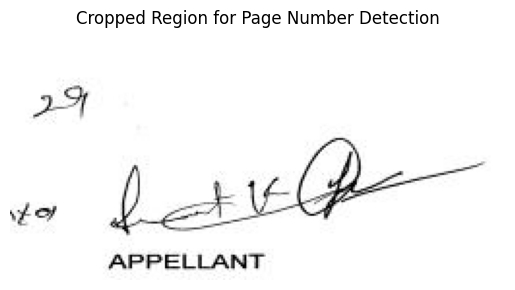

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Load image
image_path = "/content/04_02_2023_17_02_322_page_33_png.rf.c7330749a56ba9df592d4c3eaa9a176d.jpg"
image = cv2.imread(image_path)

# Crop the top-right region (adjust coordinates as needed)
h, w, _ = image.shape
cropped = image[0:int(0.2*h), int(0.6*w):w]  # Adjust the crop to focus on the page number area

# Initialize EasyOCR
reader = easyocr.Reader(['en'])

# Perform OCR on cropped image
results = reader.readtext(cropped)

# Extract detected number
page_number = None
for (bbox, text, prob) in results:
    text = text.strip()
    if text.isdigit():  # Check if the detected text is a number
        page_number = text
        break

# Display result
if page_number:
    print(f"Detected Page Number: {page_number}")
else:
    print("Page Number Not Detected")

# Show cropped image for debugging
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Cropped Region for Page Number Detection")
plt.show()
